In [2]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt
import pickle

pathToPickle = r"C:\Users\anton\OneDriveNy\OneDrive - Danmarks Tekniske Universitet\Skole\7. Semester\Social Graphs\GOT_social_graph\scripts\GOTNetwork.pkl"
file = open(pathToPickle, "rb")
G = pickle.load(file)

In [14]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=20.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=4000)


100%|██████████| 4000/4000 [00:19<00:00, 201.56it/s]

BarnesHut Approximation  took  3.44  seconds
Repulsion forces  took  14.96  seconds
Gravitational forces  took  0.14  seconds
Attraction forces  took  0.43  seconds
AdjustSpeedAndApplyForces step  took  0.42  seconds


In [19]:
print(G.nodes(data=True))

[('tyrion lannister', {}), ('sam', {}), ('davos seaworth', {}), ('bronn', {}), ('bran stark', {}), ('brienne of tarth', {}), ('waymar royce', {}), ('will', {}), ('gared', {}), ('yohn royce', {}), ('mordane', {}), ('sansa stark', {}), ('eddard stark', {}), ('jon snow', {}), ('robb stark', {}), ('rodrik cassel', {}), ('catelyn stark', {}), ('theon greyjoy', {}), ('jaime lannister', {}), ('cersei lannister', {}), ('luwin', {}), ('arya stark', {}), ('robert baratheon', {}), ('ros', {}), ('varys', {}), ('daenerys targaryen', {}), ('illyrio mopatis', {}), ('benjen stark', {}), ('jorah mormont', {}), ('khal drogo', {}), ('sandor clegane', {}), ('doreah', {}), ('irri', {}), ('viys targaryen', {}), ('joffrey baratheon', {}), ('myrcella baratheon', {}), ('assassin', {}), ('jhiqui', {}), ('mycah', {}), ('jory cassel', {}), ('renly baratheon', {}), ('petyr baelish', {}), ('pycelle', {}), ('old nan', {}), ('jeor mormont', {}), ('grenn', {}), ('pypar', {}), ('rast', {}), ('barristan selmy', {}), ('l

In [15]:
DegreeList = []
labels = {}
for (Character, attributes) in G.nodes(data=True):
#    if attributes["coast"] == "West":
#        ColourList.append("red")
#    else:
#        ColourList.append("blue")
    
    if G.degree()[Character] > 230:
        labels[Character] = Character
        print(Character,G.degree()[Character])
    
    DegreeList.append(G.degree()[Character])


tyrion lannister 420
sam 258
davos seaworth 234
bronn 322
bran stark 280
sansa stark 376
jon snow 392
robb stark 244
catelyn stark 248
theon greyjoy 332
jaime lannister 366
cersei lannister 376
arya stark 392
varys 292
daenerys targaryen 408
jorah mormont 356
sandor clegane 250
joffrey baratheon 232
petyr baelish 316
pycelle 242
samwell tarly 234


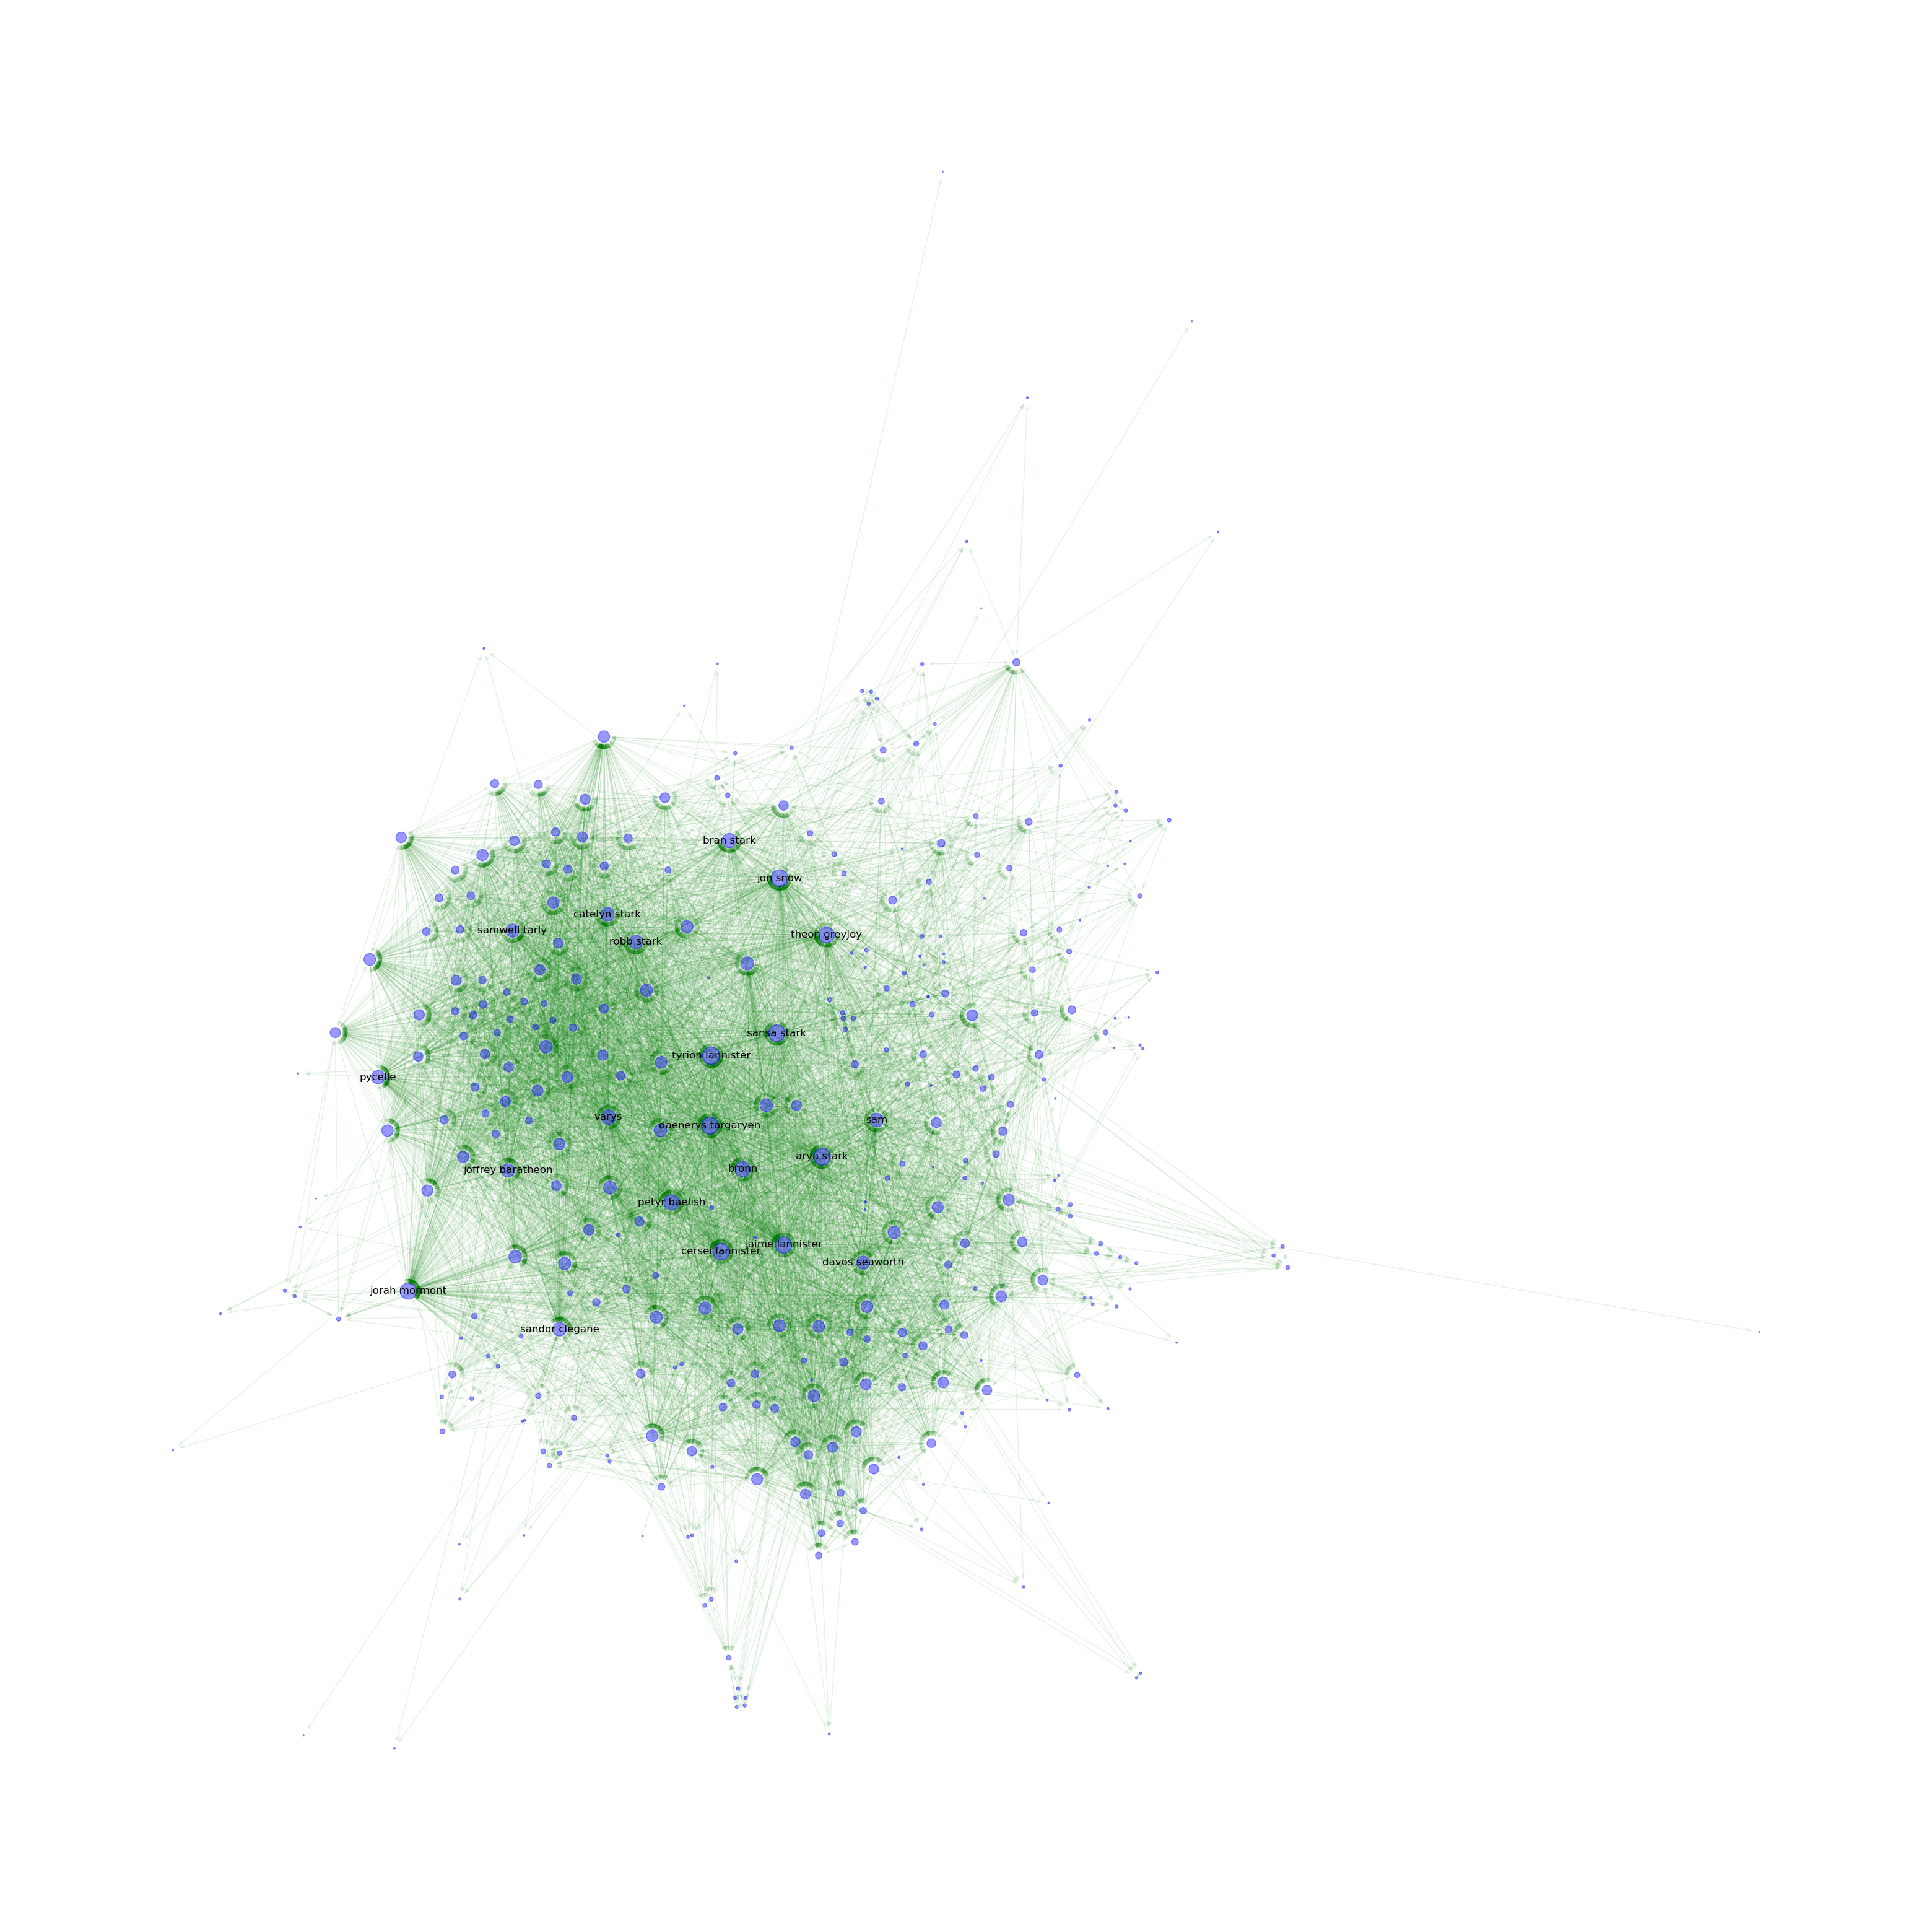

In [17]:
plt.figure(figsize=(40,40))
nx.draw_networkx_nodes(G, positions, node_size=DegreeList, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.05)
nx.draw_networkx_labels(G, positions, labels=labels)
plt.axis('off')
plt.show()

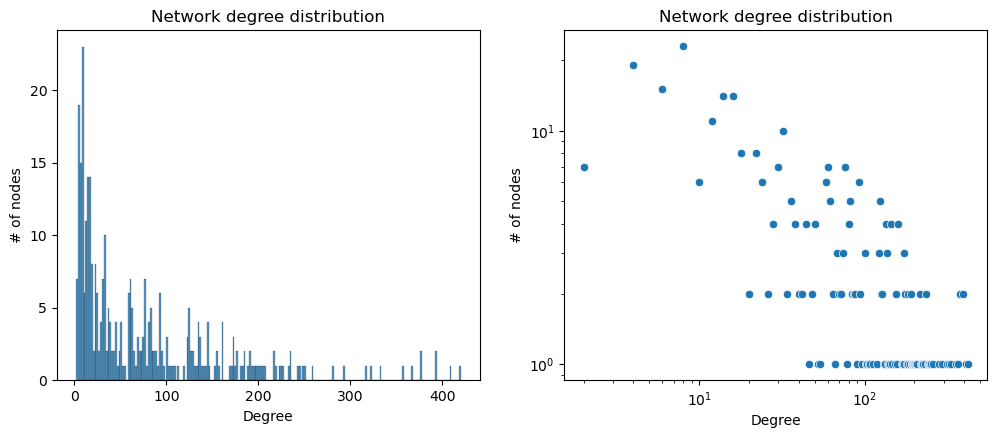

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
degree_sequence = sorted((d for n, d in G.degree()), reverse =True)

INbins = np.arange(min(degree_sequence), max(degree_sequence)+1)

pmf = [(degree_sequence == bin).sum() for bin in INbins]
pmf = np.array(pmf)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.histplot(degree_sequence,binwidth = 2)
plt.title("Network degree distribution")
plt.ylabel("# of nodes")
plt.xlabel("Degree")


plt.subplot(222)
sns.scatterplot(y = pmf, x = INbins)
plt.title("Network degree distribution")
plt.ylabel("# of nodes")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Degree")

plt.show()